In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor
import joblib
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm
import numpy as np

warnings.filterwarnings("ignore")

""" Airplane Sales"""

airplane_sales = pd.read_csv("https://raw.githubusercontent.com/LeeMorinUCF/QMB6358F23/refs/heads/main/final_exam_2020/airplane_sales.csv")

""" descriptive stats"""


print(f'Airplane Sales null values\n: {airplane_sales.isnull().sum()}')
print(f'Airplane Sales duplicated values\n: {airplane_sales.duplicated().sum()}')
print(f'Airplane Sales Data Types\n: {airplane_sales.dtypes}')
print(f'Airplane Sales Described\n: {airplane_sales.describe()}')
print(f'Airplane Sales Unique Values\n: {airplane_sales.nunique()}')


Airplane Sales null values
: 0Sale_ID    0
age         0
price       0
dtype: int64
Airplane Sales duplicated values
: 0
Airplane Sales Data Types
: 0Sale_ID    int64
age         int64
price       int64
dtype: object
Airplane Sales Described
:          0Sale_ID         age          price
count  195.000000  195.000000     195.000000
mean   198.000000   24.610256   50236.733333
std     56.435804    6.952853   41470.291455
min    101.000000   13.000000    9000.000000
25%    149.500000   19.000000   19250.000000
50%    198.000000   22.000000   33500.000000
75%    246.500000   30.000000   73500.000000
max    295.000000   44.000000  254000.000000
Airplane Sales Unique Values
: 0Sale_ID    195
age          30
price       138
dtype: int64


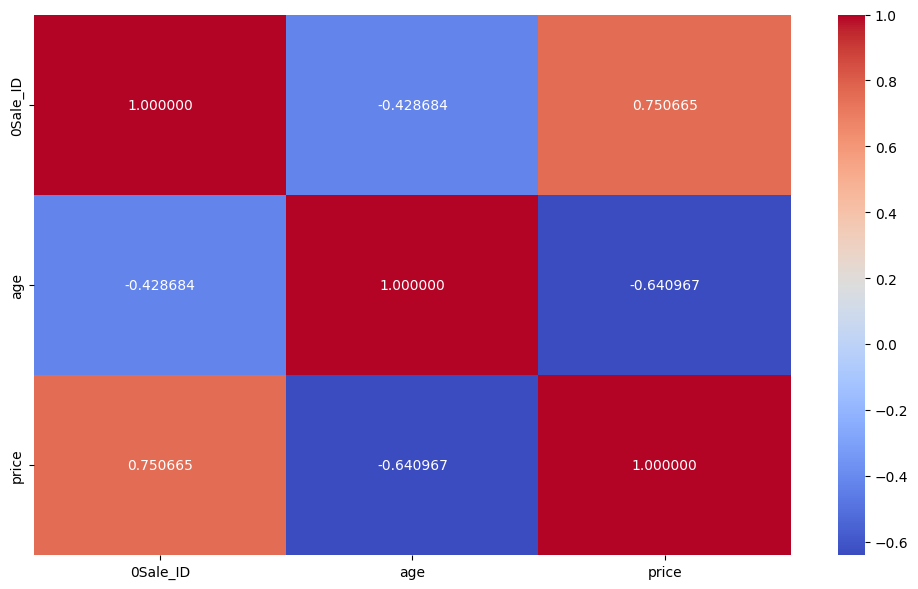

In [2]:
plt.figure(figsize=(10,6))
sns.heatmap(airplane_sales.corr(),fmt="f",annot=True,cmap="coolwarm")
plt.tight_layout()
plt.show()

In [3]:

X0 = airplane_sales[['age']]
y0 = airplane_sales['price']

OLSmodel = sm.OLS(exog=sm.add_constant(X0), endog=y0).fit()
print(f'Anova Results from Airplan Sales: {OLSmodel.summary()}')




Anova Results from Airplan Sales:                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     134.6
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           5.97e-24
Time:                        22:17:24   Log-Likelihood:                -2298.0
No. Observations:                 195   AIC:                             4600.
Df Residuals:                     193   BIC:                             4607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.443e

In [4]:


"""loading in airplan specs dataset"""


airplane_specs = pd.read_csv("https://raw.githubusercontent.com/LeeMorinUCF/QMB6358F23/refs/heads/main/final_exam_2020/airplane_specs.csv")


print(f'Airplane Specs null values\n: {airplane_specs.isnull().sum()}')
print(f'Airplane Specs duplicated values\n: {airplane_specs.duplicated().sum()}')
print(f'Airplane Specs Data Types\n: {airplane_specs.dtypes}')
print(f'Airplane Specs Described\n: {airplane_specs.describe()}')
print(f'Airplane Specs Unique Values\n: {airplane_specs.nunique()}')

airplane_specs.rename(columns={"pass":"pas"},inplace=True)

Airplane Specs null values
: 0Sale_ID    0
pass        0
wtop        0
fixgear     0
tdrag       0
dtype: int64
Airplane Specs duplicated values
: 0
Airplane Specs Data Types
: 0Sale_ID    int64
pass        int64
wtop        int64
fixgear     int64
tdrag       int64
dtype: object
Airplane Specs Described
:          0Sale_ID        pass        wtop     fixgear       tdrag
count  195.000000  195.000000  195.000000  195.000000  195.000000
mean   198.000000    4.287179    0.461538    0.451282    0.056410
std     56.435804    1.331455    0.499802    0.498902    0.231306
min    101.000000    2.000000    0.000000    0.000000    0.000000
25%    149.500000    4.000000    0.000000    0.000000    0.000000
50%    198.000000    4.000000    0.000000    0.000000    0.000000
75%    246.500000    6.000000    1.000000    1.000000    0.000000
max    295.000000    6.000000    1.000000    1.000000    1.000000
Airplane Specs Unique Values
: 0Sale_ID    195
pass          3
wtop          2
fixgear       2
tdr

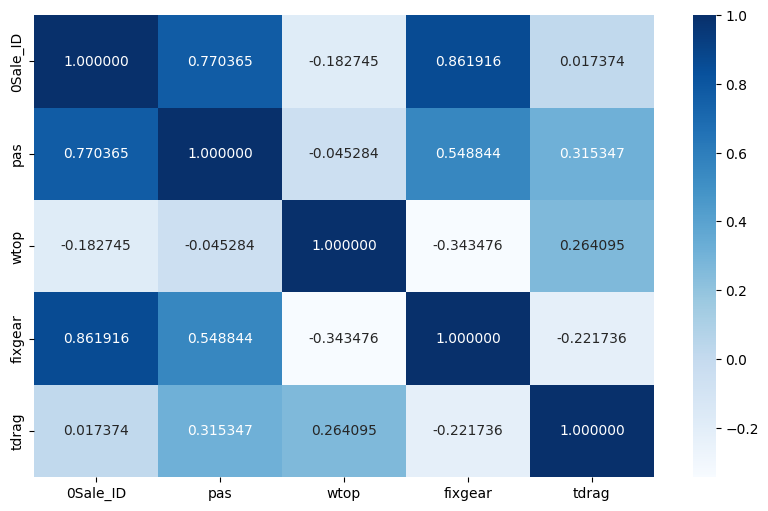

In [5]:

plt.figure(figsize=(10,6))
sns.heatmap(airplane_specs.corr(), fmt="f",annot=True,cmap="Blues")
plt.show()

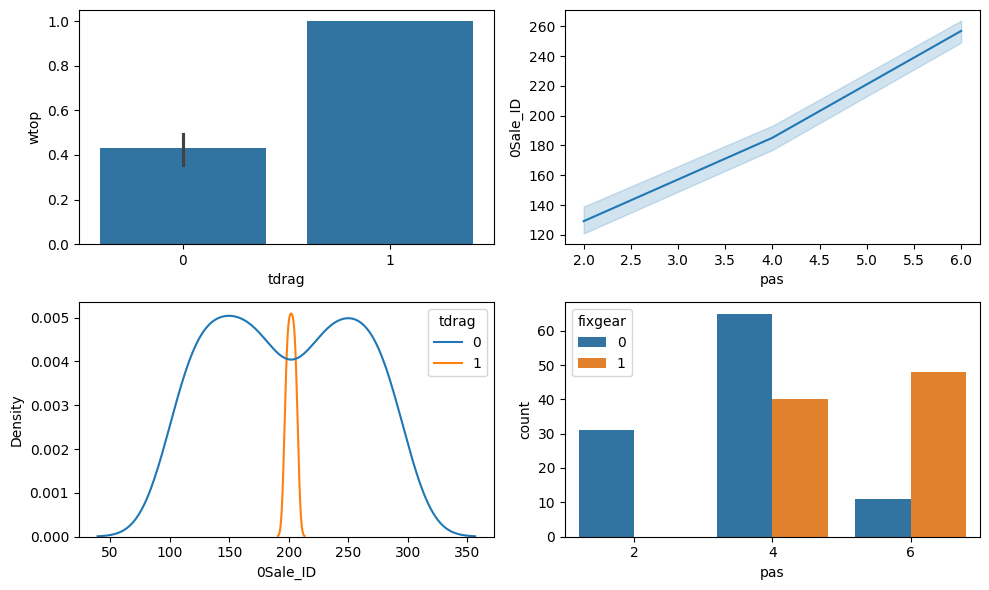

In [6]:
fig,axs = plt.subplots(2,2,figsize=(10,6))
sns.barplot(data=airplane_specs,ax=axs[0,0],x='tdrag',y='wtop')
sns.lineplot(data=airplane_specs,ax=axs[0,1],x='pas',y='0Sale_ID')
sns.kdeplot(data=airplane_specs,ax=axs[1,0],x='0Sale_ID',hue="tdrag")
sns.countplot(data=airplane_specs,ax=axs[1,1],x='pas',hue='fixgear')
plt.tight_layout()
plt.show()


In [7]:
""" combining airplane specs and airplane sales together to form:
    'airplane_sales_specs'
"""

airplane_sales_specs = pd.concat([airplane_specs,airplane_sales],axis=1)
airplane_sales_specs = airplane_sales_specs.loc[:,~airplane_sales_specs.columns.duplicated()].copy()

print(f'Airplane Sales Specs null values\n: {airplane_sales_specs.isnull().sum()}')
print(f'Airplane Sales Specs duplicated values\n: {airplane_sales_specs.duplicated().sum()}')
print(f'Airplane Sales Specs Data Types\n: {airplane_sales_specs.dtypes}')
print(f'Airplane Sales Specs Described\n: {airplane_sales_specs.describe()}')
print(f'Airplane Sales Specs Unique Values\n: {airplane_sales_specs.nunique()}')


Airplane Sales Specs null values
: 0Sale_ID    0
pas         0
wtop        0
fixgear     0
tdrag       0
age         0
price       0
dtype: int64
Airplane Sales Specs duplicated values
: 0
Airplane Sales Specs Data Types
: 0Sale_ID    int64
pas         int64
wtop        int64
fixgear     int64
tdrag       int64
age         int64
price       int64
dtype: object
Airplane Sales Specs Described
:          0Sale_ID         pas        wtop     fixgear       tdrag         age  \
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000   
mean   198.000000    4.287179    0.461538    0.451282    0.056410   24.610256   
std     56.435804    1.331455    0.499802    0.498902    0.231306    6.952853   
min    101.000000    2.000000    0.000000    0.000000    0.000000   13.000000   
25%    149.500000    4.000000    0.000000    0.000000    0.000000   19.000000   
50%    198.000000    4.000000    0.000000    0.000000    0.000000   22.000000   
75%    246.500000    6.000000    1.00

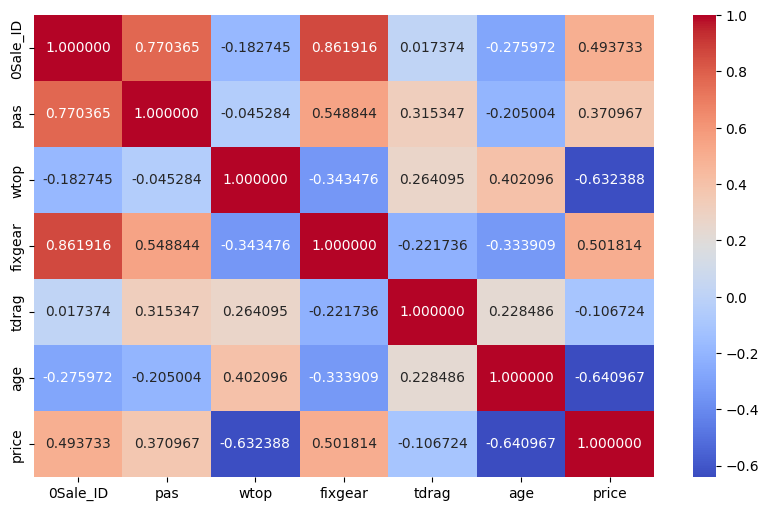

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(airplane_sales_specs.corr(), fmt="f",annot=True,cmap="coolwarm")
plt.show()

""" predicting price as a function of age,pass,wtop,fixgear and tdrag"""


X1 = airplane_sales_specs[['age','pas','wtop','fixgear','tdrag']]
y1 = airplane_sales_specs['price']


In [9]:
olsairplanesalespecs = sm.OLS(exog=sm.add_constant(X1),endog=y1).fit()
print('Results from airplane sales specs anova table\n')
print(olsairplanesalespecs.summary())


Results from airplane sales specs anova table

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     72.71
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           3.54e-42
Time:                        22:17:25   Log-Likelihood:                -2245.0
No. Observations:                 195   AIC:                             4502.
Df Residuals:                     189   BIC:                             4522.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

In [10]:


"""Loading in airplane perf"""

airplane_perf = pd.read_csv("https://raw.githubusercontent.com/LeeMorinUCF/QMB6358F23/refs/heads/main/final_exam_2020/airplane_perf.csv")

print(f'Airplane Perf null values\n: {airplane_perf.isnull().sum()}')
print(f'Airplane Perf duplicated values\n: {airplane_perf.duplicated().sum()}')
print(f'Airplane Perf Data Types\n: {airplane_perf.dtypes}')
print(f'Airplane Perf Described\n: {airplane_perf.describe()}')
print(f'Airplane Perf Unique Values\n: {airplane_perf.nunique()}')

Airplane Perf null values
: 0Sale_ID    0
horse       0
fuel        0
ceiling     0
cruise      0
dtype: int64
Airplane Perf duplicated values
: 0
Airplane Perf Data Types
: 0Sale_ID    int64
horse       int64
fuel        int64
ceiling     int64
cruise      int64
dtype: object
Airplane Perf Described
:          0Sale_ID       horse        fuel       ceiling      cruise
count  195.000000  195.000000  195.000000    195.000000  195.000000
mean   198.000000  219.210256   67.794872  14006.666667  144.738462
std     56.435804   60.512348   20.284801   4503.229845   31.277084
min    101.000000  108.000000   29.000000   8500.000000   97.000000
25%    149.500000  180.000000   51.000000   9700.000000  119.000000
50%    198.000000  210.000000   68.000000  13000.000000  144.000000
75%    246.500000  285.000000   84.000000  16800.000000  170.000000
max    295.000000  310.000000  130.000000  28000.000000  221.000000
Airplane Perf Unique Values
: 0Sale_ID    195
horse        15
fuel         27
ceilin

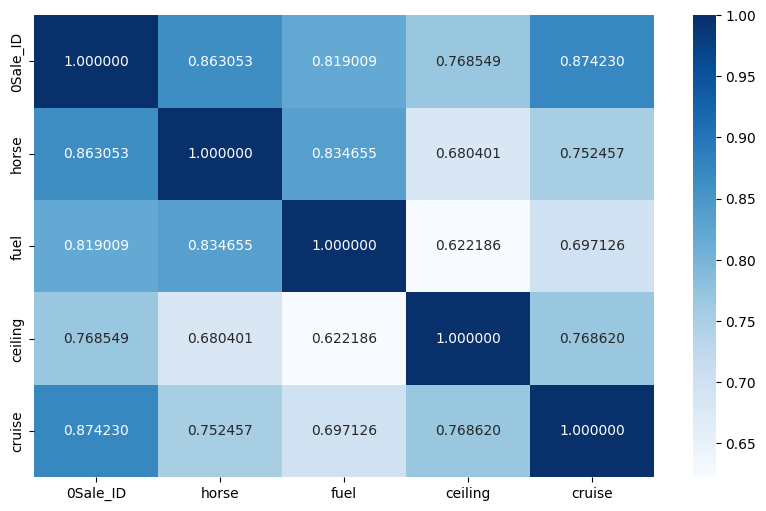

In [11]:
""" heatmap for airplane perf"""
plt.figure(figsize=(10,6))
sns.heatmap(airplane_perf.corr(),fmt="f",annot=True,cmap="Blues")
plt.show()


In [12]:
airplane_full = pd.concat([airplane_sales,airplane_specs,airplane_perf],axis=1)
airplane_full = airplane_full.loc[:,~airplane_full.columns.duplicated()].copy()

print(f'Airplane Full null values\n: {airplane_full.isnull().sum()}')
print(f'Airplane Full duplicated values\n: {airplane_full.duplicated().sum()}')
print(f'Airplane Full Data Types\n: {airplane_full.dtypes}')
print(f'Airplane Full Described\n: {airplane_full.describe()}')
print(f'Airplane Full Unique Values\n: {airplane_full.nunique()}')

Airplane Full null values
: 0Sale_ID    0
age         0
price       0
pas         0
wtop        0
fixgear     0
tdrag       0
horse       0
fuel        0
ceiling     0
cruise      0
dtype: int64
Airplane Full duplicated values
: 0
Airplane Full Data Types
: 0Sale_ID    int64
age         int64
price       int64
pas         int64
wtop        int64
fixgear     int64
tdrag       int64
horse       int64
fuel        int64
ceiling     int64
cruise      int64
dtype: object
Airplane Full Described
:          0Sale_ID         age          price         pas        wtop  \
count  195.000000  195.000000     195.000000  195.000000  195.000000   
mean   198.000000   24.610256   50236.733333    4.287179    0.461538   
std     56.435804    6.952853   41470.291455    1.331455    0.499802   
min    101.000000   13.000000    9000.000000    2.000000    0.000000   
25%    149.500000   19.000000   19250.000000    4.000000    0.000000   
50%    198.000000   22.000000   33500.000000    4.000000    0.000000   


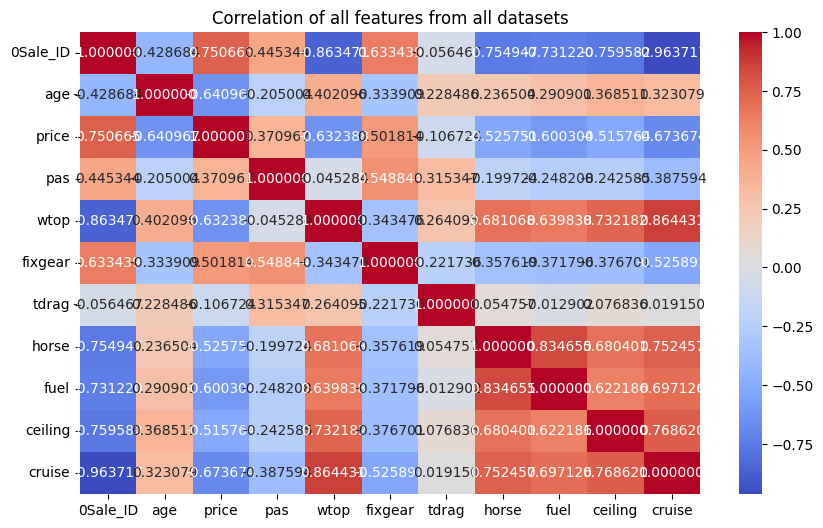

In [13]:

plt.figure(figsize=(10,6))
sns.heatmap(airplane_full.corr(),fmt="f",annot=True,cmap="coolwarm")
plt.title("Correlation of all features from all datasets")
plt.show()

In [14]:

X2 = airplane_full[["age","pas","wtop","fixgear","tdrag","horse","fuel","ceiling","cruise"]]
y2 = airplane_full['price']


olsfullmodel = sm.OLS(exog=sm.add_constant(X2), endog=y2).fit()
print('Anova from all datasets\n')
print(olsfullmodel.summary())

Anova from all datasets

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     48.00
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           8.46e-44
Time:                        22:17:26   Log-Likelihood:                -2232.1
No. Observations:                 195   AIC:                             4484.
Df Residuals:                     185   BIC:                             4517.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.725e+05   2.8

                                                Model  R2 Score  \
19       gradientboostingregressor on Log Transformed  0.943301   
14         gradientboostingregressor on Airplane Full  0.929482   
13                  baggingregressor on Airplane Full  0.917165   
18                baggingregressor on Log Transformed  0.909129   
15                linearregression on Log Transformed  0.891229   
17                           ridge on Log Transformed  0.880855   
9   gradientboostingregressor on Airplane Sales Specs  0.814298   
8            baggingregressor on Airplane Sales Specs  0.776454   
5            linearregression on Airplane Sales Specs  0.688846   
6                       lasso on Airplane Sales Specs  0.688792   
7                       ridge on Airplane Sales Specs  0.686752   
12                             ridge on Airplane Full  0.682892   
11                             lasso on Airplane Full  0.681937   
10                  linearregression on Airplane Full  0.68193

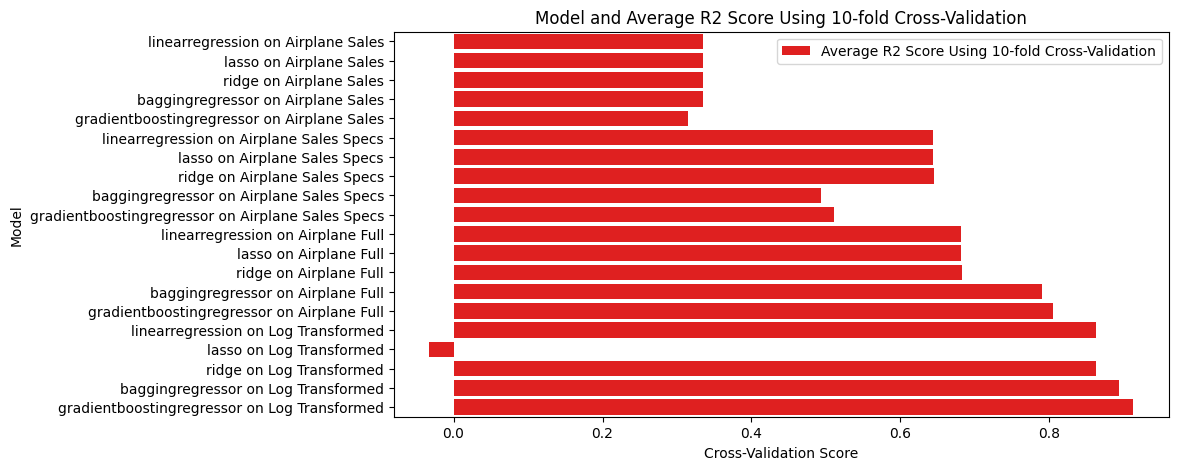

In [15]:

"""creating log variables for price,age,horse,fuel,ceiling,cruise"""




log_price = np.log(airplane_full['price'])
log_age = np.log(airplane_full['age'])
log_horse = np.log(airplane_full['horse'])
log_fuel = np.log(airplane_full['fuel'])
log_ceiling = np.log(airplane_full['ceiling'])
log_cruise = np.log(airplane_full['cruise'])




X3 = pd.DataFrame({
    "log_age": log_age,
    "pass": airplane_full["pas"],
    "wtop": airplane_full["wtop"],
    "fixgear": airplane_full["fixgear"],
    "tdrag": airplane_full["tdrag"],
    "log_horse": log_horse,
    "log_fuel": log_fuel,
    "log_ceiling": log_ceiling
})

y3 = log_price





""" going to do all of the linear regression parts now for the sake of modularization"""


def evaluate(y_test,pred,r2,mse,cv_scores,model_name):
    results = {
        "Model":model_name,
        "R2 Score":r2,
        "Mean Squared Error":mse,
        "Cross-Validation Score":cv_scores.mean()
        }
    return results



models = {
    "linearregression":LinearRegression(),
    "lasso":Lasso(),
    "ridge":Ridge(),
    "baggingregressor":BaggingRegressor(),
    "gradientboostingregressor":GradientBoostingRegressor()
    }






datasets = {
    "Airplane Sales": (X0, y0),
    "Airplane Sales Specs": (X1, y1),
    "Airplane Full": (X2, y2),
    "Log Transformed": (X3, y3)
}

results = []

for dataset_name,(X,y) in datasets.items():
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        
        r2 = r2_score(y_test, pred)
        mse = mean_squared_error(y_test, pred)
        cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
        results.append(evaluate(y_test, pred, r2, mse, cv_scores, f"{model_name} on {dataset_name}"))

df_results = pd.DataFrame(results)
pd.set_option('display.max_rows', 30)
print(df_results.sort_values(by="R2 Score",ascending=False))


plt.figure(figsize=(10,5))
sns.barplot(x=df_results['Cross-Validation Score'],y=df_results['Model'],label="Average R2 Score Using 10-fold Cross-Validation",color="red")
plt.title("Model and Average R2 Score Using 10-fold Cross-Validation")
plt.legend()
plt.show()


In [16]:


linearregression_params = {
'copy_X': [True,False], 
'fit_intercept': [True,False], 
'n_jobs': [1,5,10,15,None], 
'positive': [True,False]}



lasso_params = {
    'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
    }


ridge_params = {
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
    }




gradientboosting_params = {
    'n_estimators': [50,100,200],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3,4,5],
    'min_samples_split': [2,5,10]
    }

bagginregression_params = {
    'n_estimators': [50,100,200],
    'max_samples' : [1.0,0.8,0.6],
    'max_features': [1.0,0.8,0.6]
}



models = {
    "LinearRegression":(LinearRegression(),linearregression_params),
    "Lasso":(Lasso(),lasso_params),
    "ridge":(Ridge(),ridge_params),
    "GradientBoostingRegresser":(GradientBoostingRegressor(),gradientboosting_params),
    "BaggingREgressor":(BaggingRegressor(),bagginregression_params),
    }

best_scores = []

X_train,X_test,y_train,y_test = train_test_split(X3,y3,test_size=.20,random_state=42)

for model_name,(model,params) in models.items():    
    model.fit(X_train,y_train)
    grid_search = GridSearchCV(model,params,scoring="neg_mean_squared_error",cv=4,n_jobs=-1)
    grid_search.fit(X_train,y_train)
    print(f'Best Params for {model_name}: {grid_search.best_params_}')
    print(f'Best Score for {model_name}: {grid_search.best_score_}')
    best_scores.append({"Model":model_name,"Best Score":grid_search.best_score_})
    


best_scores_df = pd.DataFrame(best_scores)
print(best_scores_df)

Best Params for LinearRegression: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best Score for LinearRegression: -0.08595268510872461
Best Params for Lasso: {'alpha': 0.001}
Best Score for Lasso: -0.08477315450220455
Best Params for ridge: {'alpha': 0.01}
Best Score for ridge: -0.08594536481786925
Best Params for GradientBoostingRegresser: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 200}
Best Score for GradientBoostingRegresser: -0.05205050079595817
Best Params for BaggingREgressor: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
Best Score for BaggingREgressor: -0.0594180364687041
                       Model  Best Score
0           LinearRegression   -0.085953
1                      Lasso   -0.084773
2                      ridge   -0.085945
3  GradientBoostingRegresser   -0.052051
4           BaggingREgressor   -0.059418


In [17]:
linear_regression_model = LinearRegression(copy_X=True,n_jobs=1,positive=False)
linear_regression_model.fit(X_train,y_train)
y_pred = linear_regression_model.predict(X_test)
print('R2 Score Best Linear Regression Model\n')
print(r2_score(y_test, y_pred))

ridge_model = Ridge(alpha=.001)
ridge_model.fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
print('Best Score for Ridge Model\n')
print(r2_score(y_test, y_pred))

lasso_model = Lasso(alpha=0.001).fit(X_train,y_train)
y_pred = lasso_model.predict(X_test)
print(r2_score(y_test, y_pred))



R2 Score Best Linear Regression Model

0.8912291857510312
Best Score for Ridge Model

0.8912204862845632
0.889175977808095


In [19]:
features = X_train
features.rename(columns={"pass":"pas"},inplace=True)




def predict(model,features):
    model = joblib.load("models/lasso.joblib")
    features = joblib.load("models/features.joblib")
    predictions = model.predict(features)
    return [[pred] for pred in predictions] 

if __name__ == "__main__":
    predictions = predict(model,features)
    


    print("predictions")
    for i, pred in enumerate(predictions):
        if (i+1) % 10 == 0:
            print(f'Sample {i+1}: pred log price = ${(np.round(pred[0],2))}')

predictions
Sample 10: pred log price = $9.58
Sample 20: pred log price = $11.65
Sample 30: pred log price = $10.22
Sample 40: pred log price = $9.59
Sample 50: pred log price = $9.86
Sample 60: pred log price = $9.86
Sample 70: pred log price = $11.33
Sample 80: pred log price = $9.94
Sample 90: pred log price = $11.48
Sample 100: pred log price = $9.88
Sample 110: pred log price = $10.31
Sample 120: pred log price = $11.55
Sample 130: pred log price = $9.81
Sample 140: pred log price = $10.26
Sample 150: pred log price = $11.59
